In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# data=pd.read_csv(r"D:\2022BE Projects\sunflower yeild\dataset.csv")
data=pd.read_csv(r"D:\CropYield\dataset.csv")

In [50]:
data

,id,water,uv,area,fertilizer_usage,pesticides,region,categories,yield
0,169,5.615,65.281,3.230,0,8.969,0,"b,a,c",7.977
1,476,7.044,73.319,9.081,0,7.197,0,"c,a,d",23.009
2,152,5.607,60.038,2.864,2,7.424,0,"d,a",23.019
3,293,9.346,64.719,2.797,2,1.256,0,d,28.066
4,10,7.969,NaN,5.407,1,0.274,0,"c,d",29.140
...,...,...,...,...,...,...,...,...,...
4351,614,6.379,94.132,11.571,5,2.891,6,"c,b",98.673
4352,490,6.980,82.727,11.264,5,3.500,6,"d,c,b",101.090
4353,392,NaN,58.218,11.859,4,4.005,6,"c,b,a",103.673
4354,773,10.070,67.905,11.567,4,2.339,6,a,104.343


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4356 entries, 0 to 4355
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4356 non-null   int64  
 1   water             4174 non-null   float64
 2   uv                4136 non-null   float64
 3   area              4356 non-null   float64
 4   fertilizer_usage  4356 non-null   int64  
 5   pesticides        4356 non-null   float64
 6   region            4356 non-null   int64  
 7   categories        4356 non-null   object 
 8   yield             4356 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 306.4+ KB


In [52]:
data.shape

(4356, 9)

In [53]:
data.columns

Index(['id', 'water', 'uv', 'area', 'fertilizer_usage', 'pesticides', 'region',
       'categories', 'yield'],
      dtype='object')

In [54]:
data=data.drop(columns=['id','categories'],axis=1)

In [55]:
data

,water,uv,area,fertilizer_usage,pesticides,region,yield
0,5.615,65.281,3.230,0,8.969,0,7.977
1,7.044,73.319,9.081,0,7.197,0,23.009
2,5.607,60.038,2.864,2,7.424,0,23.019
3,9.346,64.719,2.797,2,1.256,0,28.066
4,7.969,NaN,5.407,1,0.274,0,29.140
...,...,...,...,...,...,...,...
4351,6.379,94.132,11.571,5,2.891,6,98.673
4352,6.980,82.727,11.264,5,3.500,6,101.090
4353,NaN,58.218,11.859,4,4.005,6,103.673
4354,10.070,67.905,11.567,4,2.339,6,104.343


In [56]:
data.isnull().sum()

water               182
uv                  220
area                  0
fertilizer_usage      0
pesticides            0
region                0
yield                 0
dtype: int64

In [57]:
import numpy as np

In [58]:
# data.water = pd.DataFrame(data.water).replace(np.nan, pd.DataFrame.median(data.water))#Replacing NaN with median
# data.uv = pd.DataFrame(data.uv).replace(np.nan, pd.DataFrame.median(data.uv))#Replacing NaN with median
data.water = data.water.fillna(data.water.median())

# Replace NaN values with median in data.uv
data.uv = data.uv.fillna(data.uv.median())

In [59]:
data.isnull().sum()

water               0
uv                  0
area                0
fertilizer_usage    0
pesticides          0
region              0
yield               0
dtype: int64

In [60]:
import seaborn as sns

<Axes: ylabel='water'>

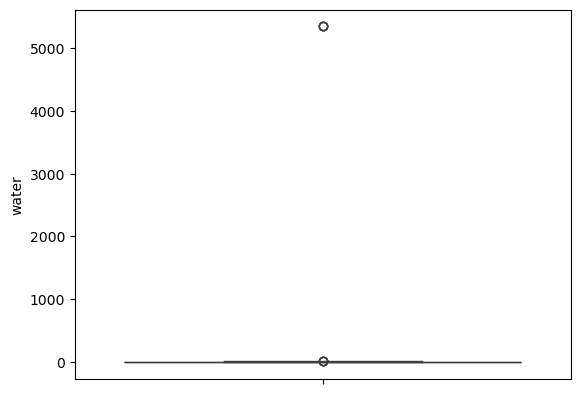

In [61]:
sns.boxplot(data["water"])

In [62]:
data.drop(data[data['water']>200].index,inplace=True)

<Axes: ylabel='water'>

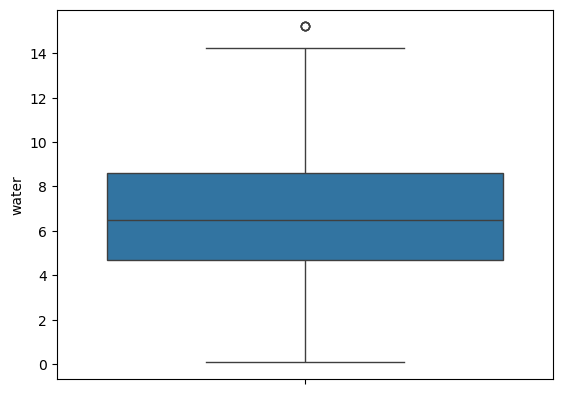

In [63]:
sns.boxplot(data["water"])

<Axes: ylabel='uv'>

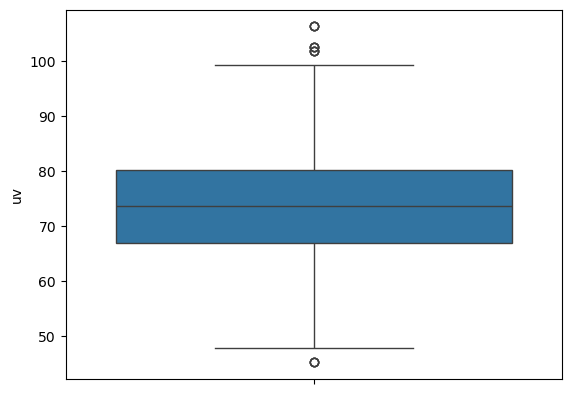

In [64]:
sns.boxplot(data["uv"])

<Axes: ylabel='count'>

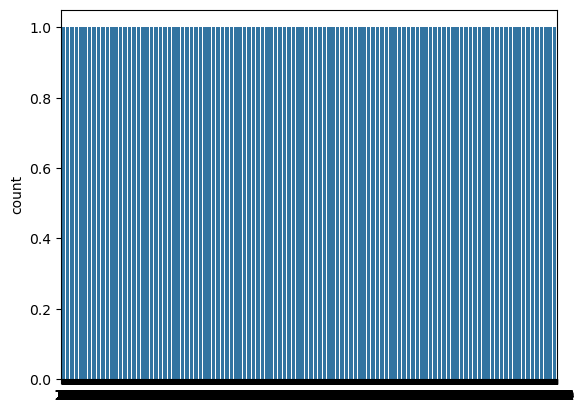

In [65]:
sns.countplot(data["water"])

<Axes: ylabel='count'>

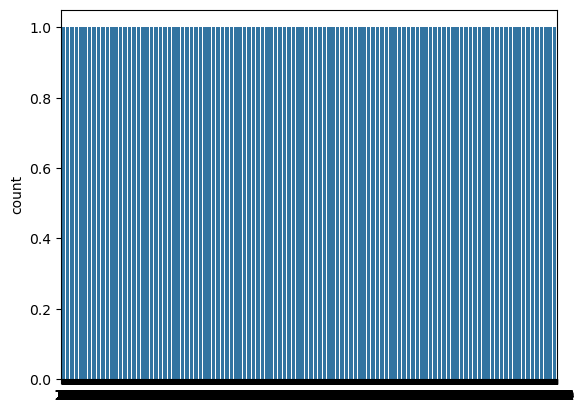

In [66]:
sns.countplot(data["region"])

<Axes: xlabel='region', ylabel='water'>

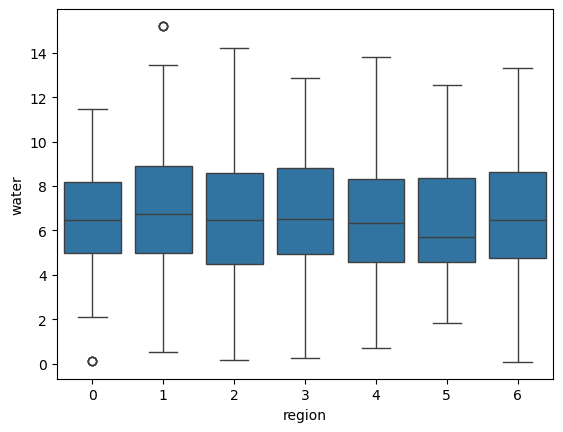

In [67]:
sns.boxplot(x=data["region"],y=data["water"])

<Axes: xlabel='region', ylabel='uv'>

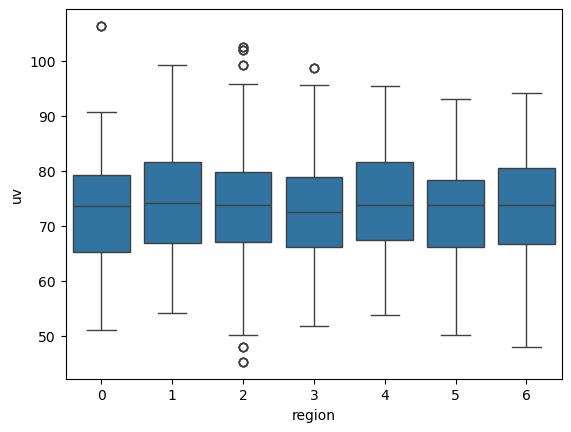

In [68]:
sns.boxplot(x=data["region"],y=data["uv"])

<Axes: xlabel='fertilizer_usage', ylabel='water'>

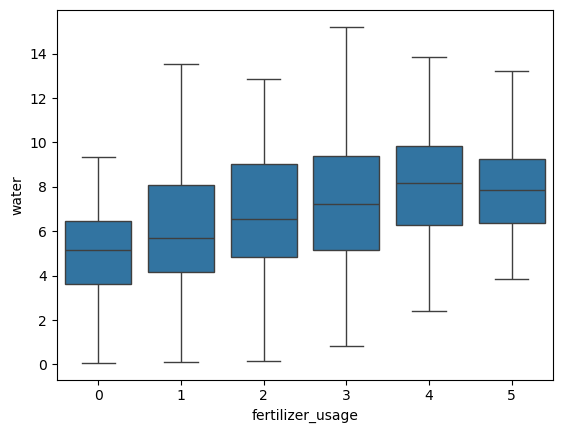

In [69]:
sns.boxplot(x=data["fertilizer_usage"],y=data["water"])

In [70]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR

In [72]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X=sc.fit_transform(X)

In [73]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3916, 6) (3916,)
Test set: (436, 6) (436,)


In [75]:

from sklearn.metrics import accuracy_score

reg=LinearRegression()
reg.fit(X_train,y_train)
yhat=reg.predict(X_test)

from sklearn.metrics import r2_score


from sklearn.metrics import mean_absolute_error

print("Mean Absolute Er0rr", mean_absolute_error(y_test, yhat))

from sklearn.metrics import mean_squared_error
mean_squared_error= mean_squared_error(y_test, yhat)
print("Mean Squared Erorr", mean_squared_error)

from math import sqrt
rootMeanSquaredError = sqrt(mean_squared_error)
print("Root Mean Squared Error",rootMeanSquaredError)

Mean Absolute Er0rr 10.805292439916407
Mean Squared Erorr 197.5190377221042
Root Mean Squared Error 14.054146637989238


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3481, 6) (3481,)
Test set: (871, 6) (871,)


In [77]:

from sklearn.metrics import accuracy_score

reg=LinearRegression()
reg.fit(X_train,y_train)
yhat=reg.predict(X_test)

from sklearn.metrics import r2_score
print("R2 aquare",r2_score(y_test, yhat))

from sklearn.metrics import mean_absolute_error

print("Mean Absolute Er0rr", mean_absolute_error(y_test, yhat))

from sklearn.metrics import mean_squared_error
mean_squared_error= mean_squared_error(y_test, yhat)
print("Mean Squared Erorr", mean_squared_error)

from math import sqrt
rootMeanSquaredError = sqrt(mean_squared_error)
print("Root Mean Squared Error",rootMeanSquaredError)

R2 aquare 0.6865392441569653
Mean Absolute Er0rr 10.841892095697391
Mean Squared Erorr 191.48382135562892
Root Mean Squared Error 13.837767932568783


In [78]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.4)
reg.fit(X_train,y_train)
yhat=reg.predict(X_test)
from sklearn.metrics import r2_score
print("R2 aquare",r2_score(y_test, yhat))

from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error", mean_absolute_error(y_test, yhat))

from sklearn.metrics import mean_squared_error
mean_squared_error= mean_squared_error(y_test, yhat)
print("Mean Squared Erorr", mean_squared_error)

from math import sqrt
rootMeanSquaredError = sqrt(mean_squared_error)
print("Root Mean Squared Error",rootMeanSquaredError)

R2 aquare 0.6853376227748761
Mean Absolute Error 10.870509217109298
Mean Squared Erorr 192.21785599880536
Root Mean Squared Error 13.864265433076696


In [79]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
yhat=lin_reg_2.predict(poly_reg.fit_transform(X_test))
from sklearn.metrics import r2_score
print("R2 aquare",r2_score(y_test, yhat))

from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error", mean_absolute_error(y_test, yhat))

from sklearn.metrics import mean_squared_error
mean_squared_error= mean_squared_error(y_test, yhat)
print("Mean Squared Erorr", mean_squared_error)

from math import sqrt
rootMeanSquaredError = sqrt(mean_squared_error)
print("Root Mean Squared Error",rootMeanSquaredError)

R2 aquare 0.8515955059613217
Mean Absolute Error 7.301853267024924
Mean Squared Erorr 90.65587667728524
Root Mean Squared Error 9.521337966761038


In [80]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 50)
regressor.fit(X_train, y_train)

yhat=regressor.predict(X_test)
from sklearn.metrics import r2_score
print("R2 aquare",r2_score(y_test, yhat))

from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error", mean_absolute_error(y_test, yhat))

from sklearn.metrics import mean_squared_error
mean_squared_error= mean_squared_error(y_test, yhat)
print("Mean Squared Erorr", mean_squared_error)

from math import sqrt
rootMeanSquaredError = sqrt(mean_squared_error)
print("Root Mean Squared Error",rootMeanSquaredError)

R2 aquare 0.9932932332439129
Mean Absolute Error 0.9133258323765816
Mean Squared Erorr 4.096963665970151
Root Mean Squared Error 2.024095765019568


In [81]:
sample_data = [5.615,65.281,3.23,0,8.969,0]
clean_data = [float(i) for i in sample_data]
ex1 = np.array(clean_data).reshape(1,-1)

In [82]:
yhat=lin_reg_2.predict(poly_reg.fit_transform(ex1))

In [83]:
yhat

array([-22.86764739])

In [84]:
yhat=reg.predict(ex1)

In [85]:
yhat

array([21.85404622])

In [86]:
reg=LinearRegression()
reg.fit(X_train,y_train)
yhat=reg.predict(ex1)
yhat

array([21.91260324])

In [87]:
reg = linear_model.Lasso(alpha=0.4)
reg.fit(X_train,y_train)
yhat=reg.predict(ex1)
yhat

array([21.85404622])

In [88]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 50)
regressor.fit(X_train, y_train)

yhat=regressor.predict(ex1)

In [89]:
yhat

array([7.977])

In [90]:
sample_data = [7.044,73.319,9.081,0,7.197,0]
clean_data = [float(i) for i in sample_data]
ex1 = np.array(clean_data).reshape(1,-1)

regressor = RandomForestRegressor(n_estimators = 10, random_state = 50)
regressor.fit(X_train, y_train)

yhat=regressor.predict(ex1)
yhat


array([23.009])

In [91]:
res = yhat[0]
res

23.009000000000004

In [95]:
sample_data = [4.805,59.935,7.387,1,5.023,0]
clean_data = [float(i) for i in sample_data]
ex1 = np.array(clean_data).reshape(1,-1)

regressor = RandomForestRegressor(n_estimators = 10, random_state = 50)
regressor.fit(X_train, y_train)

yhat=regressor.predict(ex1)
yhat

array([50.5953])

In [94]:
4.805	59.935	7.387	1	5.023	0


SyntaxError: invalid syntax (3641555837.py, line 1)